## Dolphin social network

In [37]:
import networkx as nx
import matplotlib.pyplot as plt
import community as community_louvain
import seaborn as sns
import random
import plotly.graph_objs as go
import itertools
from collections import defaultdict

In [38]:
# Leggere il file GML
G = nx.read_gml('dolphins/dolphins.gml')

### Grafo dei delfini di Doubtful Sound

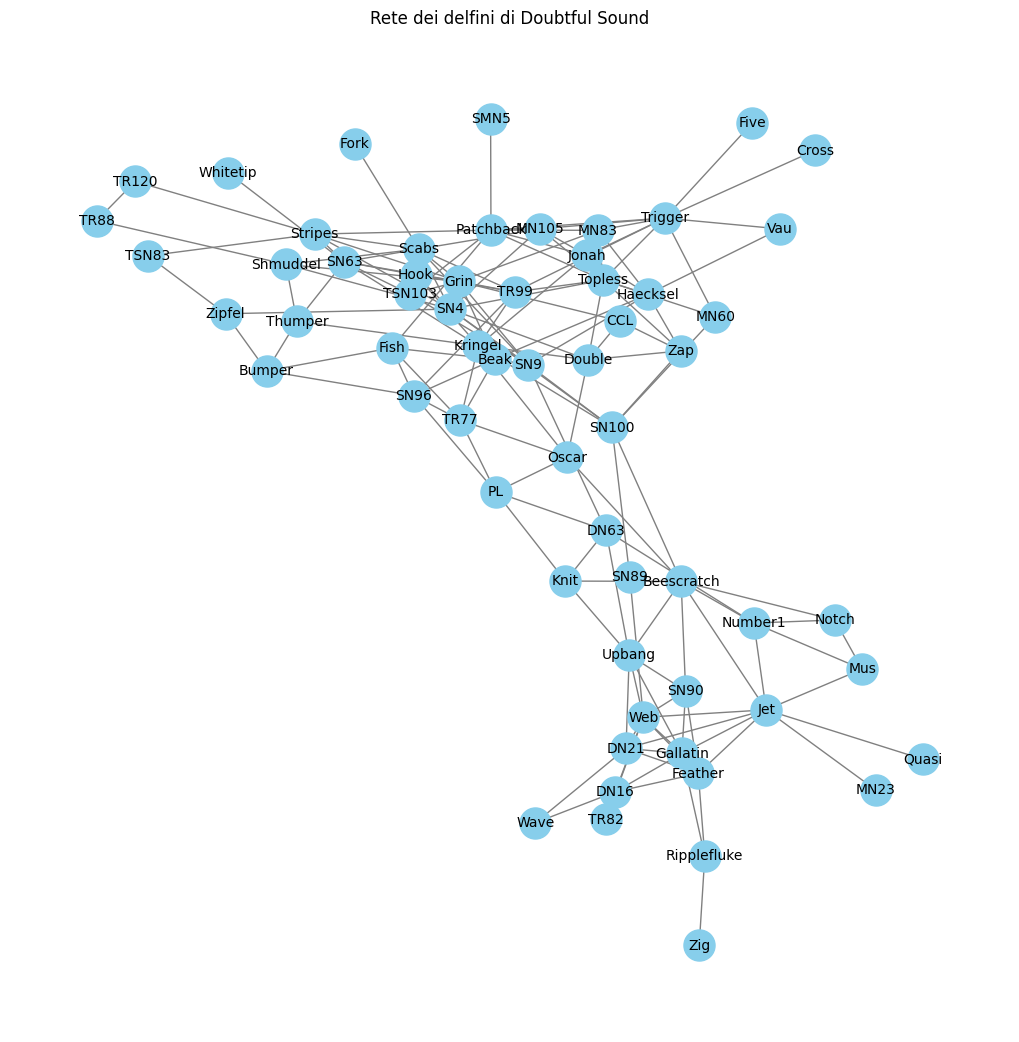

In [39]:
# Disegnare il grafo
plt.figure(figsize=(10,10))
nx.draw(G, with_labels=True, node_size=500, node_color="skyblue", edge_color="gray", font_size=10, font_color="black")
plt.title("Rete dei delfini di Doubtful Sound")
plt.show()


# Analysis

### Descriptive Analysis

In [40]:
G.nodes

NodeView(('Beak', 'Beescratch', 'Bumper', 'CCL', 'Cross', 'DN16', 'DN21', 'DN63', 'Double', 'Feather', 'Fish', 'Five', 'Fork', 'Gallatin', 'Grin', 'Haecksel', 'Hook', 'Jet', 'Jonah', 'Knit', 'Kringel', 'MN105', 'MN23', 'MN60', 'MN83', 'Mus', 'Notch', 'Number1', 'Oscar', 'Patchback', 'PL', 'Quasi', 'Ripplefluke', 'Scabs', 'Shmuddel', 'SMN5', 'SN100', 'SN4', 'SN63', 'SN89', 'SN9', 'SN90', 'SN96', 'Stripes', 'Thumper', 'Topless', 'TR120', 'TR77', 'TR82', 'TR88', 'TR99', 'Trigger', 'TSN103', 'TSN83', 'Upbang', 'Vau', 'Wave', 'Web', 'Whitetip', 'Zap', 'Zig', 'Zipfel'))

In [41]:
G.edges

EdgeView([('Beak', 'Fish'), ('Beak', 'Grin'), ('Beak', 'Haecksel'), ('Beak', 'SN9'), ('Beak', 'SN96'), ('Beak', 'TR77'), ('Beescratch', 'Jet'), ('Beescratch', 'Knit'), ('Beescratch', 'Notch'), ('Beescratch', 'Number1'), ('Beescratch', 'Oscar'), ('Beescratch', 'SN100'), ('Beescratch', 'SN90'), ('Beescratch', 'Upbang'), ('Bumper', 'Fish'), ('Bumper', 'SN96'), ('Bumper', 'Thumper'), ('Bumper', 'Zipfel'), ('CCL', 'Double'), ('CCL', 'Grin'), ('CCL', 'Zap'), ('Cross', 'Trigger'), ('DN16', 'Feather'), ('DN16', 'Gallatin'), ('DN16', 'Wave'), ('DN16', 'Web'), ('DN21', 'Feather'), ('DN21', 'Gallatin'), ('DN21', 'Jet'), ('DN21', 'Upbang'), ('DN21', 'Wave'), ('DN21', 'Web'), ('DN63', 'Knit'), ('DN63', 'Number1'), ('DN63', 'PL'), ('DN63', 'SN9'), ('DN63', 'Upbang'), ('Double', 'Kringel'), ('Double', 'Oscar'), ('Double', 'SN4'), ('Double', 'Topless'), ('Double', 'Zap'), ('Feather', 'Gallatin'), ('Feather', 'Jet'), ('Feather', 'Ripplefluke'), ('Feather', 'SN90'), ('Feather', 'Web'), ('Fish', 'Patchba

In [42]:
G.is_directed()  # per scoprire se il grafo è diretto o indiretto

False

In [43]:
print("Numero di nodi: ", G.number_of_nodes())
print("Numero di archi: ", G.number_of_edges())

Numero di nodi:  62
Numero di archi:  159


In [44]:
components = list(nx.connected_components(G))
print(f'Numero di componenti connesse: {len(components)}')

Numero di componenti connesse: 1


In [45]:
average_path_length = nx.average_shortest_path_length(G)
diameter = nx.diameter(G)
print(f'Lunghezza media del cammino più breve: {average_path_length:.2f}')
print(f'Diametro della rete: {diameter}')

Lunghezza media del cammino più breve: 3.36
Diametro della rete: 8


In [46]:
density = nx.density(G)
print(f'Densità della rete: {density}')

Densità della rete: 0.08408249603384453


In [47]:
# Calcolare il grado di ciascun nodo (numero di connessioni per ogni delfino)
degree_dict = dict(G.degree())
#print(degree_dict)

# Creare una lista di tuple (nodo, grado) e ordinare in base al grado decrescente
sorted_degrees = sorted(degree_dict.items(), key=lambda x: x[1], reverse=True)

# Stampare i nodi ordinati per grado
print("Nodi ordinati per grado (dal più alto al più basso):")
for node, degree in sorted_degrees:
    print(f"Nodo: {node}, Grado: {degree}")

Nodi ordinati per grado (dal più alto al più basso):
Nodo: Grin, Grado: 12
Nodo: SN4, Grado: 11
Nodo: Topless, Grado: 11
Nodo: Scabs, Grado: 10
Nodo: Trigger, Grado: 10
Nodo: Jet, Grado: 9
Nodo: Kringel, Grado: 9
Nodo: Patchback, Grado: 9
Nodo: Web, Grado: 9
Nodo: Beescratch, Grado: 8
Nodo: Gallatin, Grado: 8
Nodo: SN63, Grado: 8
Nodo: SN9, Grado: 8
Nodo: Feather, Grado: 7
Nodo: Haecksel, Grado: 7
Nodo: Jonah, Grado: 7
Nodo: SN100, Grado: 7
Nodo: Stripes, Grado: 7
Nodo: TR99, Grado: 7
Nodo: Upbang, Grado: 7
Nodo: Beak, Grado: 6
Nodo: DN21, Grado: 6
Nodo: Double, Grado: 6
Nodo: Hook, Grado: 6
Nodo: MN105, Grado: 6
Nodo: MN83, Grado: 6
Nodo: SN96, Grado: 6
Nodo: TR77, Grado: 6
Nodo: DN63, Grado: 5
Nodo: Fish, Grado: 5
Nodo: Number1, Grado: 5
Nodo: Oscar, Grado: 5
Nodo: PL, Grado: 5
Nodo: Shmuddel, Grado: 5
Nodo: SN90, Grado: 5
Nodo: Zap, Grado: 5
Nodo: Bumper, Grado: 4
Nodo: DN16, Grado: 4
Nodo: Knit, Grado: 4
Nodo: Thumper, Grado: 4
Nodo: TSN103, Grado: 4
Nodo: CCL, Grado: 3
Nodo: MN60,

## Centrality Measures

In [48]:
# Calcolare la centralità di grado per calcolare l'importanza di ciascun nodo
degree_centrality = nx.degree_centrality(G)

# Ordinare i nodi per centralità di grado (dal più alto al più basso)
sorted_degree_centrality = {k: v for k, v in sorted(degree_centrality.items(), key=lambda item: item[1], reverse=True)}

print("Degree centrality (dalla più grande alla più piccola):")
for node, centrality in sorted_degree_centrality.items():
    print(f"Nodo {node}: {centrality:.4f}")

Degree centrality (dalla più grande alla più piccola):
Nodo Grin: 0.1967
Nodo SN4: 0.1803
Nodo Topless: 0.1803
Nodo Scabs: 0.1639
Nodo Trigger: 0.1639
Nodo Jet: 0.1475
Nodo Kringel: 0.1475
Nodo Patchback: 0.1475
Nodo Web: 0.1475
Nodo Beescratch: 0.1311
Nodo Gallatin: 0.1311
Nodo SN63: 0.1311
Nodo SN9: 0.1311
Nodo Feather: 0.1148
Nodo Haecksel: 0.1148
Nodo Jonah: 0.1148
Nodo SN100: 0.1148
Nodo Stripes: 0.1148
Nodo TR99: 0.1148
Nodo Upbang: 0.1148
Nodo Beak: 0.0984
Nodo DN21: 0.0984
Nodo Double: 0.0984
Nodo Hook: 0.0984
Nodo MN105: 0.0984
Nodo MN83: 0.0984
Nodo SN96: 0.0984
Nodo TR77: 0.0984
Nodo DN63: 0.0820
Nodo Fish: 0.0820
Nodo Number1: 0.0820
Nodo Oscar: 0.0820
Nodo PL: 0.0820
Nodo Shmuddel: 0.0820
Nodo SN90: 0.0820
Nodo Zap: 0.0820
Nodo Bumper: 0.0656
Nodo DN16: 0.0656
Nodo Knit: 0.0656
Nodo Thumper: 0.0656
Nodo TSN103: 0.0656
Nodo CCL: 0.0492
Nodo MN60: 0.0492
Nodo Mus: 0.0492
Nodo Notch: 0.0492
Nodo Ripplefluke: 0.0492
Nodo Zipfel: 0.0492
Nodo SN89: 0.0328
Nodo TR120: 0.0328
Nodo

In [49]:
# Calcolare la centralità di betweenness per calcolare l'importanza di ciascun nodo
betweenness_centrality = nx.betweenness_centrality(G)

# Ordinare i nodi per centralità di betweenness (dal più alto al più basso)
sorted_betweenness_centrality = {k: v for k, v in sorted(betweenness_centrality.items(), key=lambda item: item[1], reverse=True)}

print("Betweenness centrality (dalla più grande alla più piccola):")
for node, centrality in sorted_betweenness_centrality.items():
    print(f"Nodo {node}: {centrality:.4f}")

Betweenness centrality (dalla più grande alla più piccola):
Nodo SN100: 0.2482
Nodo Beescratch: 0.2133
Nodo SN9: 0.1431
Nodo SN4: 0.1386
Nodo DN63: 0.1182
Nodo Jet: 0.1143
Nodo Kringel: 0.1026
Nodo Upbang: 0.0991
Nodo Trigger: 0.0847
Nodo Web: 0.0842
Nodo SN89: 0.0705
Nodo Oscar: 0.0668
Nodo Patchback: 0.0655
Nodo Stripes: 0.0628
Nodo Grin: 0.0620
Nodo Scabs: 0.0572
Nodo Gallatin: 0.0528
Nodo SN63: 0.0454
Nodo MN60: 0.0422
Nodo Topless: 0.0407
Nodo TR99: 0.0334
Nodo Haecksel: 0.0333
Nodo PL: 0.0331
Nodo Ripplefluke: 0.0328
Nodo Shmuddel: 0.0327
Nodo DN21: 0.0294
Nodo Number1: 0.0292
Nodo SN96: 0.0292
Nodo SN90: 0.0233
Nodo TR77: 0.0232
Nodo Double: 0.0224
Nodo Feather: 0.0209
Nodo Zap: 0.0203
Nodo TSN103: 0.0192
Nodo Beak: 0.0191
Nodo Fish: 0.0161
Nodo Jonah: 0.0149
Nodo Zipfel: 0.0142
Nodo Knit: 0.0133
Nodo MN105: 0.0127
Nodo Thumper: 0.0120
Nodo Bumper: 0.0091
Nodo MN83: 0.0074
Nodo DN16: 0.0044
Nodo Notch: 0.0044
Nodo Hook: 0.0033
Nodo TR120: 0.0030
Nodo CCL: 0.0024
Nodo Mus: 0.0016

In [50]:
# Calcolare la centralità di closeness
closeness_centrality = nx.closeness_centrality(G)

# Ordinare la centralità di closeness dalla più grande alla più piccola
sorted_closeness = sorted(closeness_centrality.items(), key=lambda item: item[1], reverse=True)

# Stampare la centralità di closeness ordinata
print("Closeness centrality (dalla più grande alla più piccola):")
for node, closeness in sorted_closeness:
    print(f"{node}: {closeness:.4f}")

Closeness centrality (dalla più grande alla più piccola):
SN100: 0.4178
SN9: 0.4040
SN4: 0.3987
Kringel: 0.3910
Grin: 0.3765
Beescratch: 0.3720
DN63: 0.3653
Oscar: 0.3653
Scabs: 0.3653
Double: 0.3631
TR99: 0.3506
Beak: 0.3466
Topless: 0.3466
TSN103: 0.3427
Zap: 0.3427
Haecksel: 0.3389
TR77: 0.3389
Jonah: 0.3370
Stripes: 0.3370
SN89: 0.3352
MN105: 0.3333
MN60: 0.3333
Hook: 0.3297
SN63: 0.3297
SN96: 0.3297
Trigger: 0.3297
Upbang: 0.3245
Patchback: 0.3228
PL: 0.3228
Knit: 0.3161
Number1: 0.3161
Shmuddel: 0.3161
Fish: 0.3128
MN83: 0.3128
Thumper: 0.3112
Jet: 0.3096
CCL: 0.3081
Web: 0.3020
Zipfel: 0.3020
SN90: 0.2976
Bumper: 0.2824
Notch: 0.2773
Gallatin: 0.2711
Vau: 0.2711
Fork: 0.2687
DN21: 0.2675
TSN83: 0.2596
TR120: 0.2563
Mus: 0.2552
Feather: 0.2521
Cross: 0.2490
Five: 0.2490
Whitetip: 0.2490
TR88: 0.2470
SMN5: 0.2450
DN16: 0.2383
MN23: 0.2374
Quasi: 0.2374
TR82: 0.2328
Ripplefluke: 0.2163
Wave: 0.2133
Zig: 0.1784


In [51]:
# Calcolare la centralità di eigenvector
eigenvector_centrality = nx.eigenvector_centrality(G)

# Ordinare la centralità di eigenvector dalla più grande alla più piccola
sorted_eigenvector = sorted(eigenvector_centrality.items(), key=lambda item: item[1], reverse=True)

# Stampare la centralità di eigenvector ordinata
print("Eigenvector centrality (dalla più grande alla più piccola):")
for node, eigenvector in sorted_eigenvector:
    print(f"{node}: {eigenvector:.4f}")

Eigenvector centrality (dalla più grande alla più piccola):
Grin: 0.3158
SN4: 0.3006
Topless: 0.2850
Scabs: 0.2811
TR99: 0.2177
Patchback: 0.2118
Trigger: 0.2107
Hook: 0.2080
SN9: 0.2079
MN105: 0.2073
Jonah: 0.2025
SN63: 0.1966
MN83: 0.1932
Stripes: 0.1903
Kringel: 0.1845
Haecksel: 0.1642
Double: 0.1431
Shmuddel: 0.1388
SN100: 0.1328
TSN103: 0.1296
Beak: 0.1285
Zap: 0.1118
MN60: 0.0874
SN96: 0.0810
TR77: 0.0804
CCL: 0.0793
Thumper: 0.0778
Fish: 0.0753
Oscar: 0.0682
Vau: 0.0521
Zipfel: 0.0520
DN63: 0.0429
Beescratch: 0.0421
PL: 0.0408
Bumper: 0.0398
Fork: 0.0391
TSN83: 0.0337
TR120: 0.0297
SMN5: 0.0294
Cross: 0.0293
Five: 0.0293
Whitetip: 0.0273
TR88: 0.0234
Upbang: 0.0230
SN89: 0.0209
Knit: 0.0207
Jet: 0.0175
Web: 0.0174
Number1: 0.0163
SN90: 0.0153
Gallatin: 0.0150
Feather: 0.0122
DN21: 0.0122
Notch: 0.0089
DN16: 0.0066
Mus: 0.0060
Ripplefluke: 0.0039
Wave: 0.0026
MN23: 0.0024
Quasi: 0.0024
TR82: 0.0024
Zig: 0.0005


In [52]:
# Calcolare la Load Centrality
load_centrality = nx.load_centrality(G)

# Ordinare la Load Centrality dalla più grande alla più piccola
sorted_load_centrality = sorted(load_centrality.items(), key=lambda item: item[1], reverse=True)

# Stampare la Load Centrality ordinata
print("Load centrality (dalla più grande alla più piccola):")
for node, load in sorted_load_centrality:
    print(f"{node}: {load:.4f}")

Load centrality (dalla più grande alla più piccola):
SN100: 0.2401
Beescratch: 0.1992
SN9: 0.1496
SN4: 0.1343
DN63: 0.1280
Jet: 0.1108
Upbang: 0.1005
Kringel: 0.0998
Web: 0.0892
Trigger: 0.0856
SN89: 0.0757
Patchback: 0.0672
Oscar: 0.0662
Grin: 0.0629
Stripes: 0.0624
Scabs: 0.0584
Gallatin: 0.0533
SN63: 0.0451
MN60: 0.0419
Topless: 0.0373
Haecksel: 0.0337
Ripplefluke: 0.0328
TR99: 0.0321
Number1: 0.0321
PL: 0.0319
Shmuddel: 0.0319
SN96: 0.0295
DN21: 0.0279
TR77: 0.0234
Double: 0.0229
TSN103: 0.0219
Feather: 0.0211
SN90: 0.0204
Beak: 0.0195
Zap: 0.0191
Fish: 0.0171
Jonah: 0.0157
Zipfel: 0.0154
Knit: 0.0125
Thumper: 0.0123
MN105: 0.0122
Bumper: 0.0101
MN83: 0.0073
DN16: 0.0060
Notch: 0.0044
TR120: 0.0038
Hook: 0.0031
CCL: 0.0029
Mus: 0.0017
TSN83: 0.0012
TR88: 0.0010
Vau: 0.0009
Wave: 0.0001
Cross: 0.0000
Five: 0.0000
Fork: 0.0000
MN23: 0.0000
Quasi: 0.0000
SMN5: 0.0000
TR82: 0.0000
Whitetip: 0.0000
Zig: 0.0000


In [53]:
# Top 5 nodi per centralità di grado
top_degree = sorted(degree_dict.items(), key=lambda item: item[1], reverse=True)[:5]
print("Top 5 nodi per centralità di grado:", top_degree)

# Top 5 nodi per centralità di betweenness
top_betweenness = sorted(betweenness_centrality.items(), key=lambda item: item[1], reverse=True)[:5]
print("Top 5 nodi per centralità di betweenness:", top_betweenness)

# Top 5 nodi per centralità di closeness
top_closeness = sorted(closeness_centrality.items(), key=lambda item: item[1], reverse=True)[:5]
print("Top 5 nodi per centralità di closeness:", top_closeness)

# Top 5 nodi per centralità di eigenvector
top_eigenvector = sorted(eigenvector_centrality.items(), key=lambda item: item[1], reverse=True)[:5]
print("Top 5 nodi per centralità di eigenvector:", top_eigenvector)

# Top 5 nodi per centralità di eigenvector
top_load = sorted(load_centrality.items(), key=lambda item: item[1], reverse=True)[:5]
print("Top 5 nodi per centralità di load:", top_load)

Top 5 nodi per centralità di grado: [('Grin', 12), ('SN4', 11), ('Topless', 11), ('Scabs', 10), ('Trigger', 10)]
Top 5 nodi per centralità di betweenness: [('SN100', 0.24823719602893804), ('Beescratch', 0.21332443553281097), ('SN9', 0.1431495183426175), ('SN4', 0.13856978865859435), ('DN63', 0.11823861926938342)]
Top 5 nodi per centralità di closeness: [('SN100', 0.4178082191780822), ('SN9', 0.40397350993377484), ('SN4', 0.39869281045751637), ('Kringel', 0.391025641025641), ('Grin', 0.3765432098765432)]
Top 5 nodi per centralità di eigenvector: [('Grin', 0.3157810764804676), ('SN4', 0.3005609284704956), ('Topless', 0.28500310473240437), ('Scabs', 0.281097017160587), ('TR99', 0.21769051331081507)]
Top 5 nodi per centralità di load: [('SN100', 0.24014528580102343), ('Beescratch', 0.19919624786769607), ('SN9', 0.14959271908520544), ('SN4', 0.134280987076069), ('DN63', 0.12800260936189894)]


# Altre analisi 

### Coefficiente di clustering

In [54]:
# Calcolare il coefficiente di clustering (per individuare le comunità di delfini)
clustering_coefficient = nx.average_clustering(G)
print(f"Coefficiente di clustering: {clustering_coefficient:.4f}")

Coefficiente di clustering: 0.2590


### Identificazione delle comunità

In [55]:
# Trovare le comunità usando l'algoritmo Louvain
partition = community_louvain.best_partition(G)

# Stampare i valori delle partizioni (ad ogni delfino viene assegnato un valore)
print("Valori delle partizioni:")
print(partition)
print("Numero di comunità trovate:", len(set(partition.values())))

# Aggiungere l'informazione delle comunità ai nodi
nx.set_node_attributes(G, partition, 'community')

# Lista dei colori delle comunità
community_colors = ['blue', 'green', 'red', 'purple', 'orange']

# Trovare il numero di comunità
num_communities = len(set(partition.values()))

# Disegnare la rete con colori diversi per ciascuna comunità
plt.figure(figsize=(10,10))
pos = nx.spring_layout(G, seed=42)  # Imposta il seed per riproducibilità della disposizione

# Creare una lista di colori per i nodi in base alle comunità
node_colors = [community_colors[partition[node]] for node in G.nodes()]

# Disegnare i nodi e gli archi
nx.draw_networkx_nodes(G, pos, node_color=node_colors, cmap=plt.cm.get_cmap('viridis', num_communities), node_size=500)
nx.draw_networkx_edges(G, pos, edge_color='gray')
nx.draw_networkx_labels(G, pos, font_size=10, font_color="black")
plt.title("Rete dei delfini di Doubtful Sound - Comunità identificate")
plt.show()

Valori delle partizioni:
{'Beak': 0, 'Beescratch': 4, 'Bumper': 0, 'CCL': 2, 'Cross': 3, 'DN16': 4, 'DN21': 4, 'DN63': 0, 'Double': 2, 'Feather': 4, 'Fish': 0, 'Five': 3, 'Fork': 1, 'Gallatin': 4, 'Grin': 1, 'Haecksel': 3, 'Hook': 1, 'Jet': 4, 'Jonah': 3, 'Knit': 0, 'Kringel': 1, 'MN105': 3, 'MN23': 4, 'MN60': 3, 'MN83': 3, 'Mus': 4, 'Notch': 4, 'Number1': 4, 'Oscar': 2, 'Patchback': 3, 'PL': 0, 'Quasi': 4, 'Ripplefluke': 4, 'Scabs': 1, 'Shmuddel': 1, 'SMN5': 3, 'SN100': 2, 'SN4': 1, 'SN63': 1, 'SN89': 2, 'SN9': 1, 'SN90': 4, 'SN96': 0, 'Stripes': 1, 'Thumper': 1, 'Topless': 3, 'TR120': 1, 'TR77': 0, 'TR82': 4, 'TR88': 1, 'TR99': 1, 'Trigger': 3, 'TSN103': 1, 'TSN83': 1, 'Upbang': 4, 'Vau': 3, 'Wave': 4, 'Web': 4, 'Whitetip': 1, 'Zap': 2, 'Zig': 4, 'Zipfel': 1}
Numero di comunità trovate: 5


AttributeError: module 'matplotlib.cm' has no attribute 'get_cmap'

<Figure size 1000x1000 with 0 Axes>

## Gruppi di nodi

### Clique

Top 5 clique per dimensione:
Clique 1: ['Topless', 'Trigger', 'Jonah', 'Patchback', 'MN105']
Clique 2: ['Topless', 'Trigger', 'Jonah', 'Patchback', 'MN83']
Clique 3: ['Jet', 'DN21', 'Feather', 'Gallatin', 'Web']
Clique 4: ['DN16', 'Feather', 'Gallatin', 'Web']
Clique 5: ['Topless', 'Haecksel', 'MN83', 'Jonah']


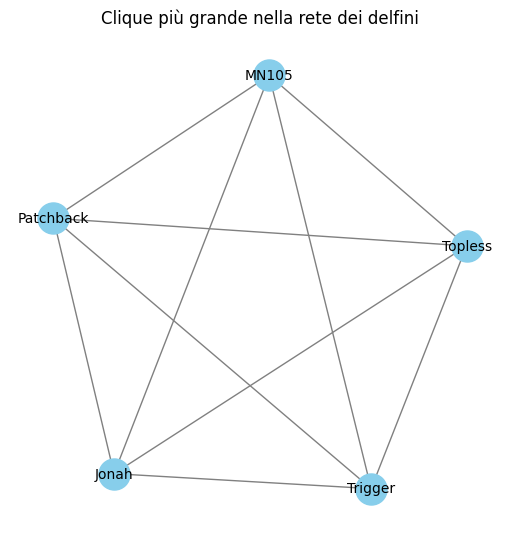

In [65]:
# Trovare tutte le clique massimali nella rete
cliques = list(nx.find_cliques(G))

# Ordinare le clique per dimensione (numero di nodi)
sorted_cliques = sorted(cliques, key=len, reverse=True)

# Stampare le prime 5 clique per dimensione
print("Top 5 clique per dimensione:")
for i, clique in enumerate(sorted_cliques[:5]):
    print(f"Clique {i+1}: {clique}")

# Visualizzare la clique più grande
largest_clique = sorted_cliques[0]

plt.figure(figsize=(5,5))
subgraph = G.subgraph(largest_clique)
pos = nx.spring_layout(subgraph)  # Calcolo delle posizioni per una visualizzazione migliore
nx.draw(subgraph, pos, with_labels=True, node_size=500, node_color="skyblue", edge_color="gray", font_size=10, font_color="black")
plt.title("Clique più grande nella rete dei delfini")
plt.show()

Visualizzazione grafica di tutte le clique separatamente e nell'intera rete

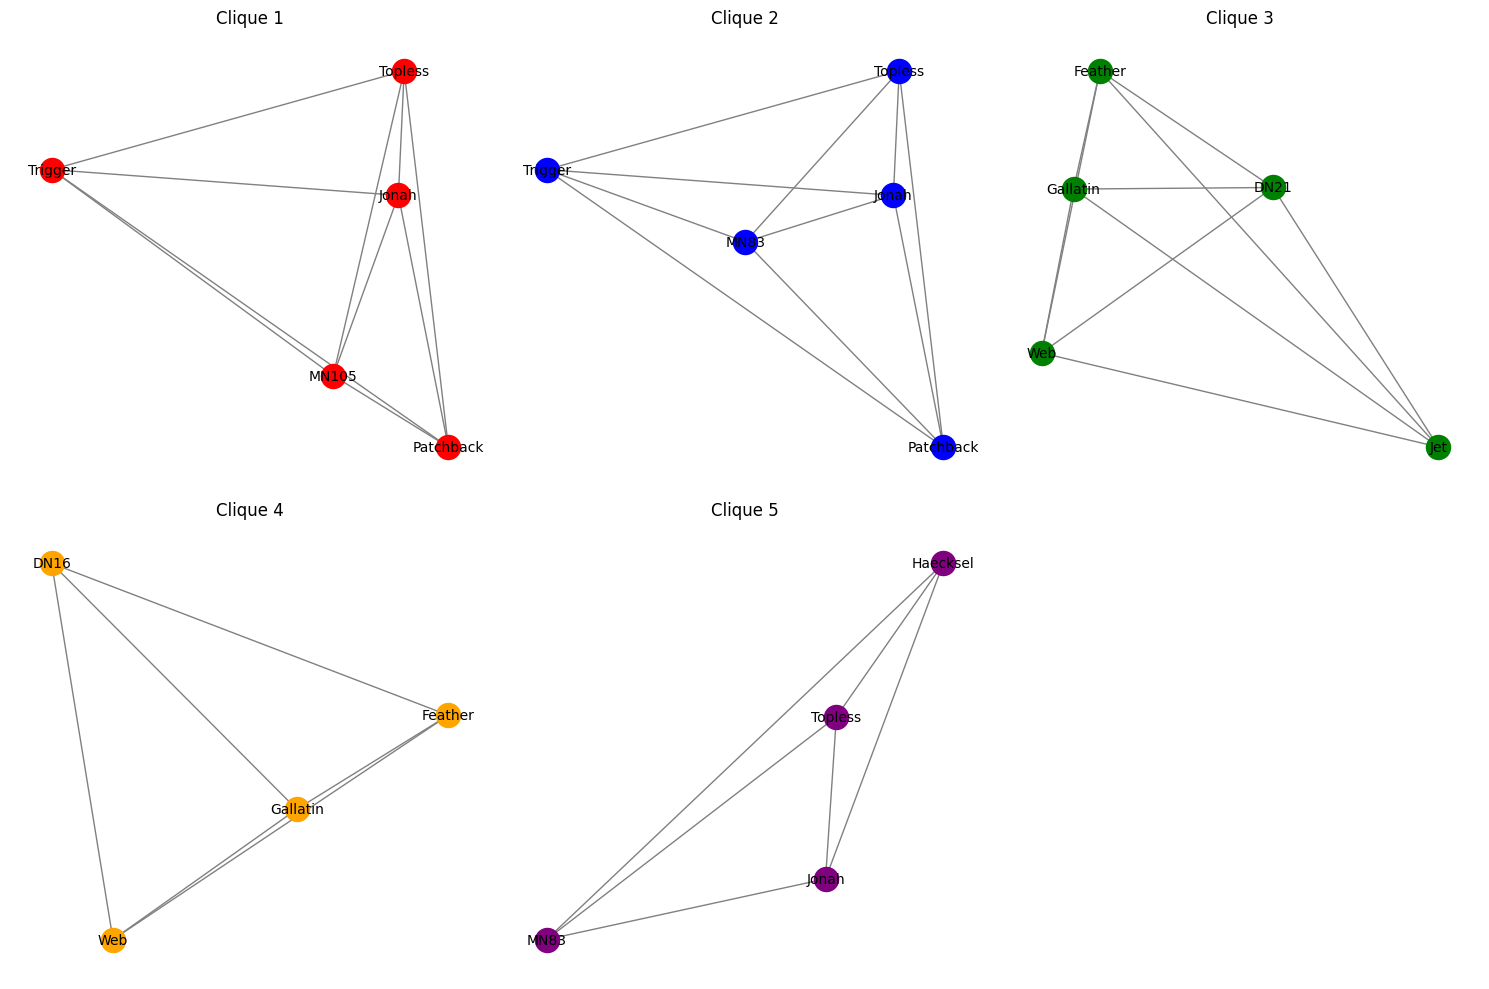

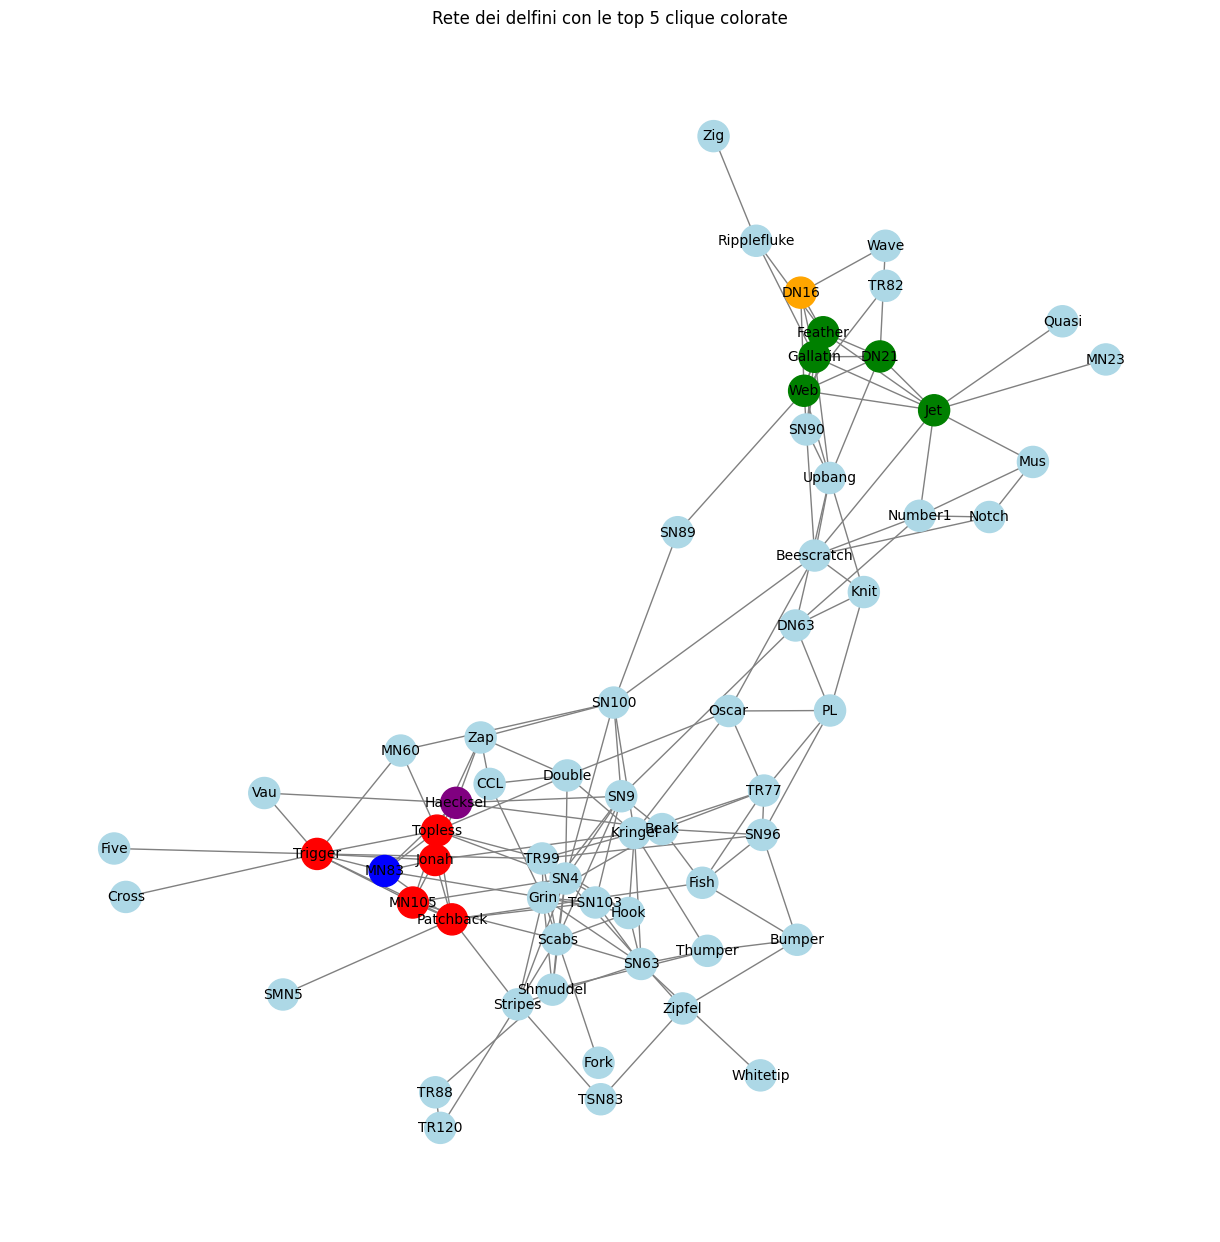

In [66]:
# Prendere le prime 5 clique per dimensione
top_5_cliques = sorted_cliques[:5]

# Calcolare la disposizione dei nodi per l'intera rete
pos = nx.spring_layout(G)

# Definire i colori per le clique
colors = ['red', 'blue', 'green', 'orange', 'purple']

# Stampare ciascuna clique in un grafico separato
plt.figure(figsize=(15, 10))
for i, clique_nodes in enumerate(top_5_cliques):
    subgraph = G.subgraph(clique_nodes)
    plt.subplot(2, 3, i + 1)
    nx.draw(subgraph, pos, with_labels=True, node_color=colors[i], edge_color="gray", font_size=10, font_color="black")
    plt.title(f"Clique {i + 1}")

plt.tight_layout()
plt.show()

# Disegnare l'intera rete con le clique colorate
plt.figure(figsize=(12, 12))
node_colors = []
for node in G.nodes():
    for i, clique_nodes in enumerate(top_5_cliques):
        if node in clique_nodes:
            node_colors.append(colors[i])
            break
    else:
        node_colors.append('lightblue')  # colore per i nodi che non appartengono alle top 5 clique

nx.draw(G, pos, with_labels=True, node_size=500, node_color=node_colors, edge_color="gray", font_size=10, font_color="black")
plt.title("Rete dei delfini con le top 5 clique colorate")
plt.show()

# COMMENTO
Le cliques sono sottografi completi all'interno di un grafo, il che significa che ogni nodo all'interno di una clique è connesso a ogni altro nodo nella stessa clique. Nel contesto della tua rete di delfini, le cliques più grandi indicano gruppi di delfini che sono molto interconnessi tra loro. Ecco come puoi interpretare le prime 5 cliques che hai identificato:

1. **Clique 1**: ['Topless', 'Trigger', 'Jonah', 'Patchback', 'MN105']
   - Questa clique è composta da delfini chiamati Topless, Trigger, Jonah, Patchback e MN105. Tutti questi delfini sono fortemente interconnessi tra loro all'interno della rete.

2. **Clique 2**: ['Topless', 'Trigger', 'Jonah', 'Patchback', 'MN83']
   - Questa è una clique simile alla prima, ma con il delfino MN83 al posto di MN105. Anche qui, tutti i delfini sono interconnessi tra loro.

3. **Clique 3**: ['Jet', 'DN21', 'Gallatin', 'Feather', 'Web']
   - Questa clique è formata dai delfini Jet, DN21, Gallatin, Feather e Web. Anche loro sono fortemente interconnessi tra loro.

4. **Clique 4**: ['Grin', 'Scabs', 'SN63', 'Stripes']
   - Questa clique include i delfini Grin, Scabs, SN63 e Stripes. Sono un gruppo di delfini che sono tutti connessi direttamente tra loro.

5. **Clique 5**: ['Grin', 'Scabs', 'SN63', 'Hook']
   - Questa è un'altra clique simile alla precedente, con il delfino Hook al posto di Stripes. Anch'essi sono fortemente interconnessi.

### Interpretazione delle Cliques:

Le cliques più grandi indicano gruppi di delfini che hanno relazioni molto strette all'interno della rete. Questi gruppi possono rappresentare comunità sociali o gruppi che interagiscono più frequentemente tra loro rispetto ad altri delfini nella rete. L'identificazione delle cliques fornisce una panoramica utile per comprendere la struttura della rete sociale dei delfini di Doubtful Sound, mostrando gruppi di nodi fortemente coinvolti in interazioni reciproche.


### K-core

Nodi nel K-core (K=3): ['Beak', 'Beescratch', 'Bumper', 'CCL', 'DN16', 'DN21', 'DN63', 'Double', 'Feather', 'Fish', 'Gallatin', 'Grin', 'Haecksel', 'Hook', 'Jet', 'Jonah', 'Knit', 'Kringel', 'MN105', 'MN60', 'MN83', 'Mus', 'Notch', 'Number1', 'Oscar', 'Patchback', 'PL', 'Scabs', 'Shmuddel', 'SN100', 'SN4', 'SN63', 'SN9', 'SN90', 'SN96', 'Stripes', 'Thumper', 'Topless', 'TR77', 'TR99', 'Trigger', 'TSN103', 'Upbang', 'Web', 'Zap']


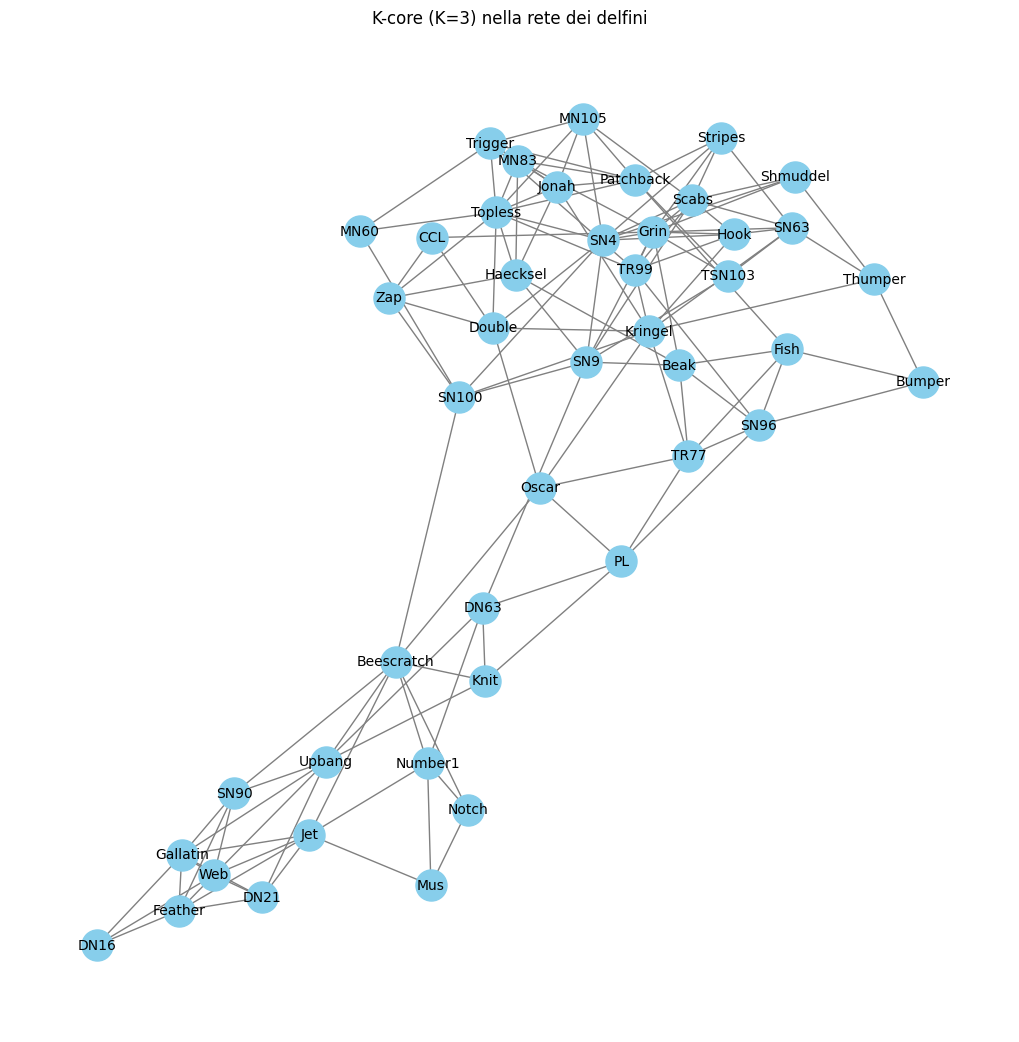

In [ ]:
# Calcolare i cores della rete con K=3 (esempio)
k = 3
k_core = nx.k_core(G, k=k)

# Visualizzare i nodi nel K-core
core_nodes = k_core.nodes()
print("Nodi nel K-core (K=3):", core_nodes)

plt.figure(figsize=(10,10))
pos = nx.spring_layout(k_core)  # Calcolo delle posizioni per una visualizzazione migliore
nx.draw(k_core, pos, with_labels=True, node_size=500, node_color="skyblue", edge_color="gray", font_size=10, font_color="black")
plt.title(f"K-core (K={k}) nella rete dei delfini")
plt.show()

# COMMENTO


L'analisi del K-core fornisce una visione dettagliata della struttura della rete dei delfini di Doubtful Sound, concentrandosi sui sottografi densamente interconnessi e resilienti all'interno della rete. Ecco alcuni punti chiave da considerare:

1. **Interconnessioni robuste**: I nodi nel K-core sono tutti fortemente interconnessi tra loro, il che significa che ogni nodo ha almeno K connessioni con altri nodi nel sottografo K-core. Questo suggerisce che i delfini all'interno del K-core hanno interazioni frequenti e stabilite tra loro.

2. **Importanza nella rete**: I nodi nel K-core sono considerati importanti nella rete perché mantengono la coesione e la struttura del sottografo. Rimuovere questi nodi potrebbe compromettere la connettività e la resilienza della rete.

3. **Identificazione di gruppi chiave**: Il K-core può aiutare a identificare gruppi di delfini che sono centrali nella rete sociale. Questi gruppi potrebbero corrispondere a comunità sociali ben definite o a gruppi di delfini che interagiscono più frequentemente tra loro rispetto al resto della rete.

4. **Indicazioni per ulteriori analisi**: L'identificazione del K-core può guidare ulteriori analisi, come l'analisi delle proprietà dinamiche della rete nel tempo o l'identificazione di nodi chiave per la trasmissione di informazioni o comportamenti sociali.

5. **Confronto con altre misure di centralità**: I nodi nel K-core spesso corrispondono a nodi con alta centralità di grado, ma non sempre. Esplorare le differenze tra nodi nel K-core e quelli con altre misure di centralità può fornire una comprensione più approfondita della struttura della rete.

**Conclusioni**: L'analisi del K-core nella rete dei delfini di Doubtful Sound evidenzia la presenza di gruppi ben interconnessi e resilienti all'interno della rete. Questo sottografo K-core rappresenta una parte cruciale della rete sociale dei delfini, indicando nodi e gruppi che potrebbero giocare un ruolo chiave nelle dinamiche sociali e comportamentali della popolazione di delfini studiata.

### K-component

In [ ]:
# Calcolare i 3-componenti nella rete
k_components = list(nx.k_components(G))

# Verificare se ci sono k-componenti presenti
if k_components and isinstance(k_components[0], dict):
    # Trovare il 3-componente massimale (se presente)
    max_k_component = max(k_components, key=lambda x: len(next(iter(x.values()))), default={})
    max_k_component_nodes = next(iter(max_k_component.values()), []) if max_k_component else []

    print("Massimo 3-componente nella rete:", max_k_component_nodes)

    # Visualizzare il 3-componente nella rete, se presente
    if max_k_component_nodes:
        plt.figure(figsize=(12, 12))
        subgraph = G.subgraph(max_k_component_nodes)
        pos = nx.spring_layout(subgraph)  # Calcolo delle posizioni per una visualizzazione migliore
        nx.draw(subgraph, pos, with_labels=True, node_size=500, node_color="skyblue", edge_color="gray", font_size=10, font_color="black")
        plt.title("Massimo 3-componente nella rete dei delfini")
        plt.show()
    else:
        print("Nessun 3-componente trovato nella rete.")
else:
    print("Nessun k-componente trovato nella rete.")


Nessun k-componente trovato nella rete.


# COMMENTO

Il messaggio "Nessun k-componente trovato nella rete" significa che non è stato individuato alcun k-componente nella rete dei delfini di Doubtful Sound. Un k-componente in una rete è definito come un sottoinsieme massimale di nodi in cui ogni coppia di nodi è connessa da almeno k cammini indipendenti. In altre parole, un k-componente è un gruppo di nodi tale che qualsiasi coppia di nodi in esso è connessa da almeno k cammini distinti che non condividono nodi intermedi.

Nel contesto della tua rete di delfini:

- **Assenza di k-componenti**: L'assenza di k-componenti indica che non ci sono sottografi massimali dove ogni coppia di nodi è collegata da almeno k cammini indipendenti. Questo potrebbe essere dovuto alla struttura specifica della rete dei delfini di Doubtful Sound, dove le connessioni potrebbero non essere distribuite in modo tale da formare tali sottografi.

- **Implicazioni**: La mancanza di k-componenti può significare che la rete non presenta gruppi di nodi estremamente resilienti e fortemente interconnessi come definito dalla definizione di k-componente. Questo può influenzare la resilienza strutturale della rete rispetto alla rimozione di nodi o archi, non trovando gruppi di nodi che siano altamente interconnessi in modo robusto.

Sebbene non siano stati individuati k-componenti nella rete dei delfini di Doubtful Sound, è possibile che altre misure e analisi come il K-core, le cliques, o altre proprietà strutturali possano fornire ulteriori insights sulla struttura della rete e sui suoi sottografi più significativi.

### Omofilia

In [ ]:
degree_assortativity = nx.degree_assortativity_coefficient(G)
print(f"Coefficiente di assortatività per grado: {degree_assortativity:.4f}")

Coefficiente di assortatività per grado: -0.0436


# COMMENTO

Il coefficiente di assortatività per grado misura il livello di omofilia nella rete, cioè quanto i nodi sono simili tra loro in base al loro grado di connettività (numero di collegamenti). Un valore positivo indica assortatività, ossia nodi con grado simile tendono a connettersi tra loro, mentre un valore negativo indica disassortatività, cioè nodi con gradi diversi tendono a connettersi tra loro.

Nel tuo caso, il coefficiente di assortatività per grado è -0.0436. Questo valore negativo suggerisce una leggera tendenza verso la disassortatività per grado nella rete dei delfini di Doubtful Sound. In altre parole, nodi con diversi gradi di connettività sembrano avere una leggera preferenza nel collegarsi tra loro piuttosto che con nodi di grado simile.

### Interpretazione:
- **Disassortatività debole**: Il valore negativo vicino a zero indica che la tendenza alla disassortatività per grado è molto modesta. Questo può indicare che, in generale, la rete non mostra una forte tendenza per i nodi di diverso grado di connettività di collegarsi tra loro.

- **Implicazioni**: Una disassortatività debole potrebbe significare che la struttura della rete dei delfini di Doubtful Sound non è fortemente influenzata dal grado di connettività dei nodi quando si formano le connessioni. Ciò potrebbe influenzare dinamiche come la diffusione delle informazioni o l'evoluzione delle relazioni sociali tra i delfini.

### Triadi

In [ ]:
# Calcolo manuale delle triadi in una rete non diretta
def count_triads(graph):
    triad_counts = defaultdict(int)

    for node in graph.nodes():
        neighbors = set(graph.neighbors(node))
        for neighbor in neighbors:
            # Trova l'intersezione dei vicini per trovare le triadi
            common_neighbors = neighbors & set(graph.neighbors(neighbor))

            # Conta le triadi in base alla lunghezza dell'intersezione
            for common_neighbor in common_neighbors:
                if graph.has_edge(node, common_neighbor):
                    triad_type = tuple(sorted([node, neighbor, common_neighbor]))
                    triad_counts[triad_type] += 1

    return triad_counts

# Calcolare le triadi nella tua rete
triad_counts = count_triads(G)

# Numero totale di triadi
total_triads = sum(triad_counts.values())
print(f"Numero totale di triadi: {total_triads}")

# Stampa delle triadi e dei loro conteggi
print("Distribuzione delle triadi nella rete:")
for triad_type, count in triad_counts.items():
    print(f"Triade {triad_type}: {count}")

Numero totale di triadi: 570
Distribuzione delle triadi nella rete:
Triade ('Beak', 'Haecksel', 'SN9'): 6
Triade ('Beak', 'Grin', 'SN9'): 6
Triade ('Beak', 'Fish', 'SN96'): 6
Triade ('Beak', 'SN96', 'TR77'): 6
Triade ('Beak', 'Fish', 'TR77'): 6
Triade ('Beescratch', 'Knit', 'Upbang'): 6
Triade ('Beescratch', 'Notch', 'Number1'): 6
Triade ('Beescratch', 'SN90', 'Upbang'): 6
Triade ('Beescratch', 'Jet', 'Number1'): 6
Triade ('Bumper', 'Fish', 'SN96'): 6
Triade ('CCL', 'Double', 'Zap'): 6
Triade ('DN16', 'Feather', 'Gallatin'): 6
Triade ('DN16', 'Feather', 'Web'): 6
Triade ('DN16', 'Gallatin', 'Web'): 6
Triade ('DN21', 'Upbang', 'Web'): 6
Triade ('DN21', 'Feather', 'Web'): 6
Triade ('DN21', 'Jet', 'Web'): 6
Triade ('DN21', 'Gallatin', 'Web'): 6
Triade ('DN21', 'Feather', 'Jet'): 6
Triade ('DN21', 'Feather', 'Gallatin'): 6
Triade ('DN21', 'Gallatin', 'Jet'): 6
Triade ('DN21', 'Gallatin', 'Upbang'): 6
Triade ('DN63', 'Knit', 'Upbang'): 6
Triade ('DN63', 'Knit', 'PL'): 6
Triade ('Double', 'S

# COMMENTOOO

La distribuzione delle triadi nella rete dei delfini di Doubtful Sound mostra che ci sono complessivamente 570 triadi. Ogni triade è rappresentata da un insieme di tre nodi, e il conteggio accanto a ciascuna triade indica quante volte quella particolare combinazione di nodi si verifica all'interno della rete. 

Interpretazione:
Numero totale di triadi: Ci sono 570 triadi nella rete.
Distribuzione uniforme: Ogni triade è rappresentata esattamente 6 volte, il che potrebbe indicare una distribuzione uniforme delle triadi nella rete, senza alcune triadi significativamente più comuni di altre.
Considerazioni:
Le triadi sono importanti nella teoria delle reti sociali perché rappresentano configurazioni di tre nodi e possono essere indicative di strutture sociali più complesse come i cluster o le comunità.
Analizzare le triadi può fornire insight sulla coesione della rete, sulla formazione di gruppi e sulla resilienza della rete alle perturbazioni.

## PROVEEEE

In [ ]:
# Rimuovere nodi e verificare l'effetto sul diametro

original_diameter = nx.diameter(G)

# Copiare il grafo per evitare modifiche permanenti
G_copy = G.copy()
nodes_to_remove = random.sample(list(G_copy.nodes()), k=5)

G_copy.remove_nodes_from(nodes_to_remove)

try:
    new_diameter = nx.diameter(G_copy)
    print(f"Diametro originale: {original_diameter}, nuovo diametro dopo rimozione dei nodi: {new_diameter}")
except nx.NetworkXError:
    print("La rete è diventata sconnessa dopo la rimozione dei nodi.")


La rete è diventata sconnessa dopo la rimozione dei nodi.


In [ ]:
# Creare layout 3D per la rete
pos_3d = nx.spring_layout(G, dim=3)

# Traccia degli archi
edge_trace = []
for edge in G.edges():
    x0, y0, z0 = pos_3d[edge[0]]
    x1, y1, z1 = pos_3d[edge[1]]
    edge_trace.append(go.Scatter3d(
        x=[x0, x1, None],
        y=[y0, y1, None],
        z=[z0, z1, None],
        mode='lines',
        line=dict(color='gray', width=1)
    ))

# Traccia dei nodi
node_trace = go.Scatter3d(
    x=[pos_3d[node][0] for node in G.nodes()],
    y=[pos_3d[node][1] for node in G.nodes()],
    z=[pos_3d[node][2] for node in G.nodes()],
    mode='markers+text',
    text=[node for node in G.nodes()],  # Usare l'ID del nodo come etichetta
    marker=dict(size=5, color='skyblue')
)

fig = go.Figure(data=edge_trace + [node_trace])
fig.update_layout(title="Rete dei delfini in 3D",
                  scene=dict(xaxis=dict(showbackground=False),
                             yaxis=dict(showbackground=False),
                             zaxis=dict(showbackground=False)))
fig.show()


